In [209]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import random

## Veri Okuma

In [210]:
x_train=pickle.load(open('/content/drive/MyDrive/Python/calismalarim/deep_learning/man_woman/save_dataset/X.train','rb'))
y_train=pickle.load(open('/content/drive/MyDrive/Python/calismalarim/deep_learning/man_woman/save_dataset/Y.train','rb'))
x_test=pickle.load(open('/content/drive/MyDrive/Python/calismalarim/deep_learning/man_woman/save_dataset/X.test','rb'))
y_test=pickle.load(open('/content/drive/MyDrive/Python/calismalarim/deep_learning/man_woman/save_dataset/y.test','rb'))

In [211]:
print('x_train len:',len(x_train))
print('y_train len:',len(y_train))
print('x_test len:',len(x_test))
print('y_test len:',len(y_test))

x_train len: 1625
y_train len: 1625
x_test len: 346
y_test len: 346


## Data Analizi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


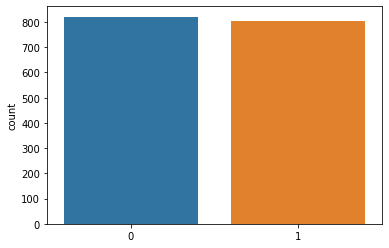

In [212]:
sns.countplot(y_train)
plt.show()

## Normalization

0


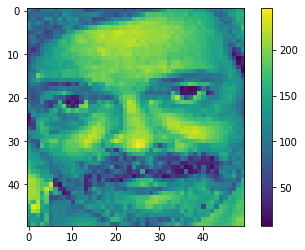

In [213]:
a=random.randrange(0,1600)
plt.imshow(x_train[a])
print(y_train[a])
plt.colorbar()
plt.show()

In [214]:
x_train=np.asarray(x_train)/255
x_test=np.asarray(x_test)/255
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
x_train=x_train.reshape(-1,50,50,1)
x_test=x_test.reshape(-1,50,50,1)

In [215]:
x_train.shape

(1625, 50, 50, 1)

## Model Oluşturma

In [216]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(50,50,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [217]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [218]:
history_model=model.fit(x_train,y_train,epochs=5)

Epoch 1/5
51/51 [==============================] - 66s 1s/step - loss: 0.6990 - accuracy: 0.5646
Epoch 2/5
51/51 [==============================] - 65s 1s/step - loss: 0.5009 - accuracy: 0.7485
Epoch 3/5
51/51 [==============================] - 65s 1s/step - loss: 0.4031 - accuracy: 0.8116
Epoch 4/5
51/51 [==============================] - 64s 1s/step - loss: 0.2942 - accuracy: 0.8884
Epoch 5/5
51/51 [==============================] - 66s 1s/step - loss: 0.2498 - accuracy: 0.9002


In [219]:
test_loss, test_accuracy=model.evaluate(x_test,y_test,verbose=1)

11/11 [==============================] - 4s 357ms/step - loss: 0.3377 - accuracy: 0.8699


## Model Görselleştirme

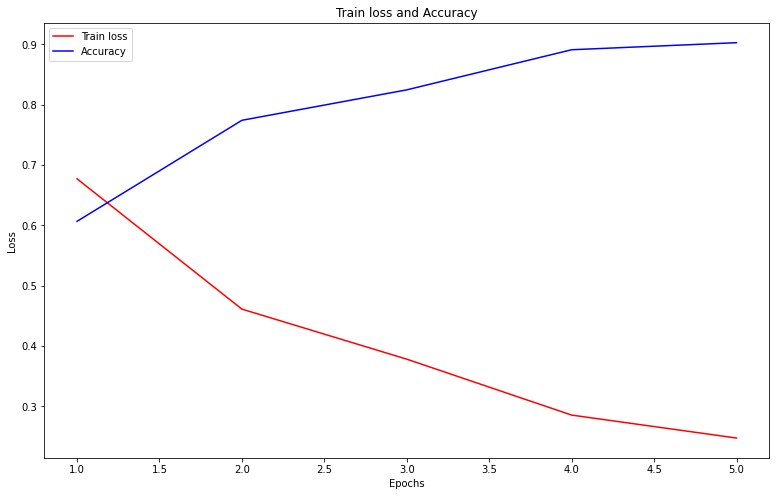

In [254]:
epoch=range(1,6)
plt.figure(figsize=(13,8))
loss_train = history_model.history['loss']
Accuracy = history_model.history['accuracy']
plt.plot(epochs,loss_train, 'r', label='Train loss')
plt.plot(epochs,Accuracy, 'b', label='Accuracy')
plt.title('Train loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Save

In [266]:
model.save('woman_man_model.h5')

## Tahminler

In [255]:
prediction=model.predict(x_test)

In [256]:
categori={
    0:'MAN',
    1:'WOMAN'
}

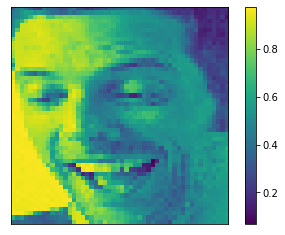

Gerçek Veri : MAN
0.04559212923049927
Tahmin Erkek


In [264]:
a=random.randrange(0,300)
plt.grid()
plt.imshow(x_test[a,:,:,0])
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()
print('Gerçek Veri :',categori[int(y_test[a])])
print(float(prediction[a]))
if prediction[a]>=0.5:
  print('Tahmin Kadın')
else:
  print('Tahmin Erkek')

## Gerçek Hayat Testi

In [259]:
import PIL

img=PIL.Image.open('/content/drive/MyDrive/Python/calismalarim/deep_learning/man_woman/gerçek_foto/133832076_2806724452934093_3635089569913380053_n.jpg')
img=img.resize((50,50))
img=np.asarray(img)/255
print(img.shape)

(50, 50, 3)


(50, 50)
(1, 50, 50, 1)


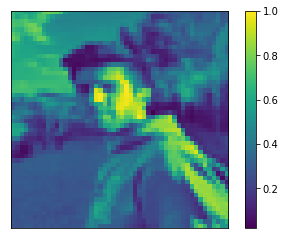

In [260]:
img=img[:,:,0]
print(img.shape)
img=img.reshape(1,50,50,1)
print(img.shape)
plt.grid()
plt.imshow(img[0,:,:,0])
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

In [261]:
prediction2=model.predict(img)

print(float(prediction2))
if prediction2>=0.5:
  print('Tahmin Kadın')
else:
  print('Tahmin Erkek')

0.022347748279571533
Tahmin Erkek
